## Levantamento de características


In [138]:
import numpy as np
import matplotlib.pyplot as plt

In [139]:
def parametros(sinal,janela,fs,win = None):
    #### Escolha da janela
    
    janela = int(np.round(fs/janela)) 
    passo = int(np.round(janela/2))
    
    if (win == None):
        win = np.hamming(janela)
    elif (win == 'Hamming' or win == 'hamming'):
        win = np.hamming(janela)
    elif (win == 'Hanning' or win == 'hanning'):
        win = np.hanning(janela)
    elif (win == 'Blackman' or win == 'blackman'):
        win = np.blackman(janela) 
    elif (win == 'Bartlett' or win == 'bartlett'):
        win = np.bartlett(janela)     
    else: 
        return print('Erro: Janela não especificada')
    
    ####Separando em janelas

    init = 0
    RMS = []
    VMR = []
    KMED = []
    KMOD = []
    KMEDIAN = []
    
    while True:   
        amostras = sinal[init:(init + janela)]
        if(len(amostras) == janela):
            
            ### medidas temporais
            
            amostras = amostras * win
            
            ### RMS
            rms = np.sqrt((np.sum(abs(amostras)**2)/len(amostras)))
            RMS = np.append(RMS,rms)
            
            ### VMR
            
            vmr = abs(np.sum(amostras))/len(amostras)
            VMR = np.append(VMR,vmr)
            
            
            ### medidas em frequência
            
            if (len(amostras)%2 == 0):
                amostras = np.fft.fft(amostras[0:(int(len(amostras)/2))])
                
            else:
                amostras = np.fft.fft(amostras[0:(int(len(amostras)-1)/2)])
            
            ### frequência média
            
            kmed = (abs(np.sum(amostras))**2)/abs(np.sum(amostras))
            KMED = np.append(KMED,kmed)
            
            ### frequência modal
            
            kmod = np.real(amostras[np.argmax(abs(amostras**2))])
            KMOD = np.append(KMOD,kmod)
            
            ### frequência mediana
            
            kmedian = np.median(abs(amostras)**2)
            KMEDIAN = np.append(KMEDIAN,kmedian)
            
            init += passo
        else:
            break
    
    return RMS,VMR,KMED,KMOD,KMEDIAN

In [140]:
A = np.random.rand(10000)

In [141]:
a,b,c,d,e = parametros(A,1,1000,'Hamming')

In [142]:
print(a, '\n',b, '\n',c, '\n',d, '\n',e, '\n')

[0.36796581 0.36934922 0.3742887  0.36865529 0.37106479 0.36580519
 0.36059855 0.36509907 0.36473046 0.35435263 0.36044678 0.36309771
 0.3597973  0.36417518 0.37312666 0.35575852 0.3577272  0.37306999
 0.36948158] 
 [0.27470123 0.27378525 0.27770975 0.27235977 0.27225186 0.27091978
 0.26958818 0.2713122  0.27073482 0.26151094 0.26724343 0.27244965
 0.26613174 0.26956823 0.27709251 0.26325368 0.26706688 0.27970168
 0.27648515] 
 [14.14486216 32.41626508  6.09712631 36.76010608 16.09194702 14.380625
 31.57412195  5.69495902  7.44580777 14.7304272  28.51196018  1.21912265
 21.98536089 27.4859097  17.48739697 26.587086    4.58891832 14.27202728
  7.54365037] 
 [134.8876247  136.33150197 140.23192375 138.8704304  132.60354501
 134.79139592 136.84668124 134.17267453 140.64764829 132.39813982
 128.68802437 141.90168758 132.51440494 129.58194434 136.42602469
 131.20259697 127.79363682 141.58979955 135.74591356] 
 [11.84722158 12.1014501  12.23019164 11.30671298 14.26659191 12.85907863
 10.5891

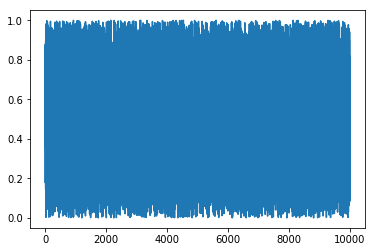

In [143]:
plt.plot(A)

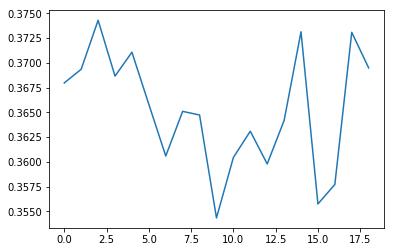

In [144]:
plt.plot(a)

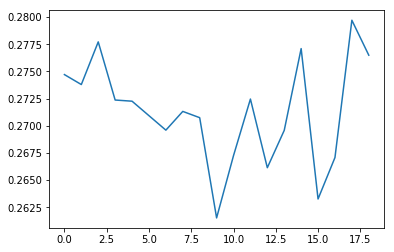

In [145]:
plt.plot(b)

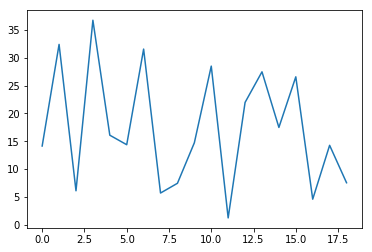

In [146]:
plt.plot(c)

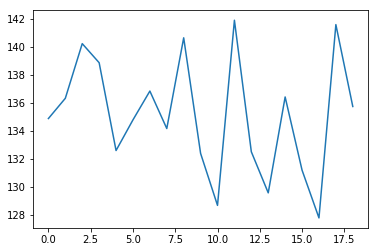

In [147]:
plt.plot(d)

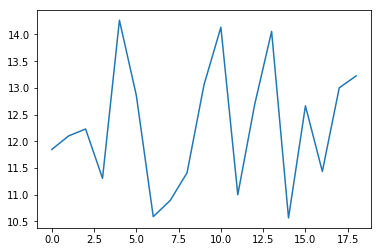

In [148]:
plt.plot(e)